In [1]:
import cv2 as cv
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d    

import numpy as np
import cvlib

plt.style.use('dark_background') 

%matplotlib inline

PATH = 'C:\GitHub\pythonPrograms\computerVision2023\clases\imagenes'

(1081, 1081)


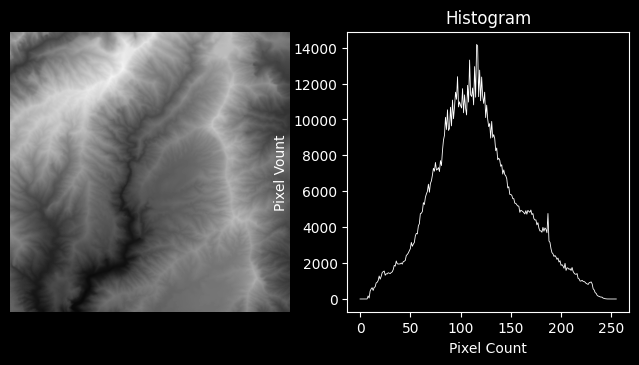

In [2]:
# img = cv.imread('im/subimage.pgm', cv.IMREAD_GRAYSCALE)
img = cv.imread(PATH+'\height.png', cv.IMREAD_COLOR)[:,:,0]
print(img.shape)
cvlib.hist(img)

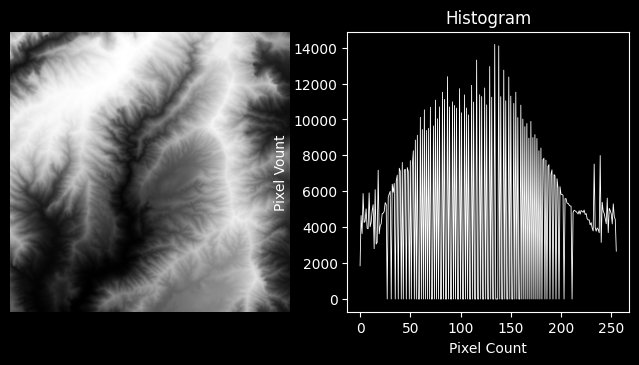

In [3]:
img = cvlib.imgeq(img)
cvlib.hist(img)

In [4]:
thresh_val = 180
ret, thresh = cv.threshold(img, thresh_val, 255, cv.THRESH_BINARY)

In [5]:
print(ret)

180.0


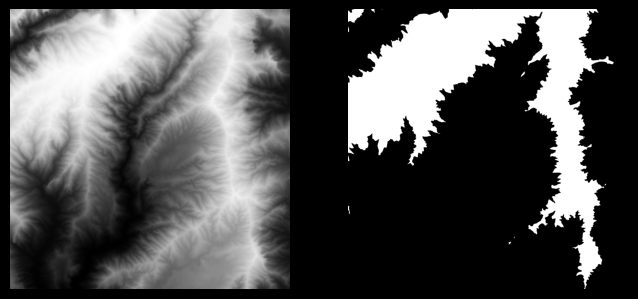

In [6]:
cvlib.imgcmp(img, thresh)

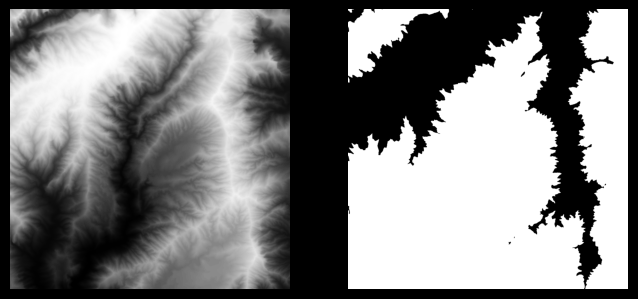

In [8]:
binarized = cv.threshold(img,thresh_val,255, cv.THRESH_BINARY_INV)[1]
cvlib.imgcmp(img, binarized)

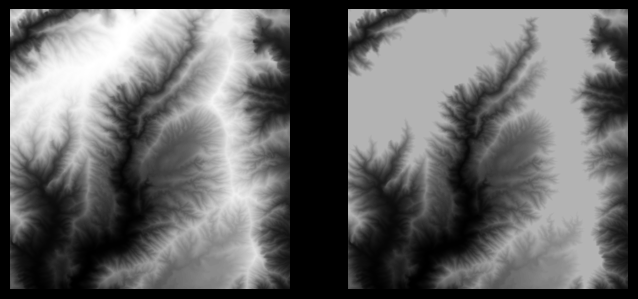

In [9]:
trunc = cv.threshold(img,thresh_val,255, cv.THRESH_TRUNC)[1]
cvlib.imgcmp(img, trunc)

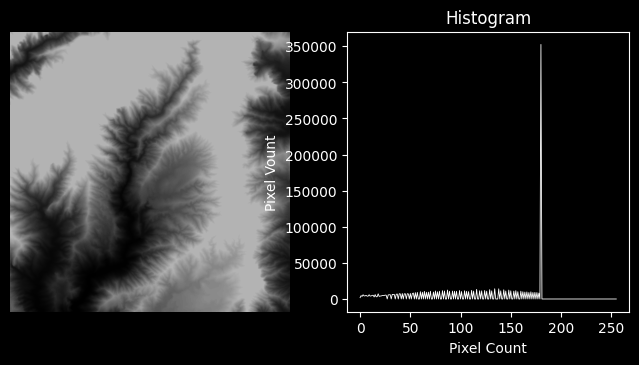

In [10]:
cvlib.hist(trunc)

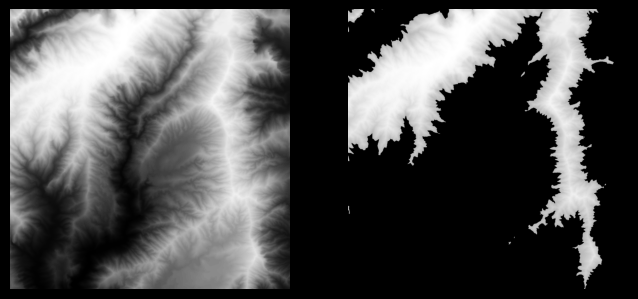

In [11]:
to_zero = cv.threshold(img,thresh_val,255,cv.THRESH_TOZERO)[1]
cvlib.imgcmp(img, to_zero)

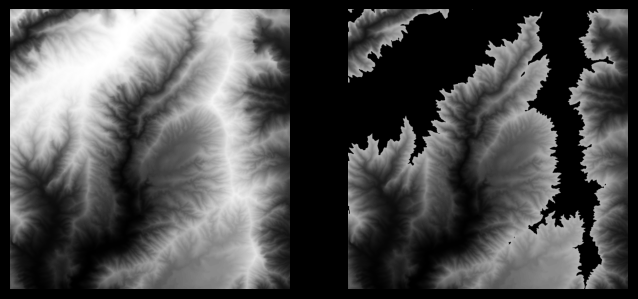

In [12]:
to_zero = cv.threshold(img,thresh_val,255,cv.THRESH_TOZERO_INV)[1]
cvlib.imgcmp(img, to_zero)

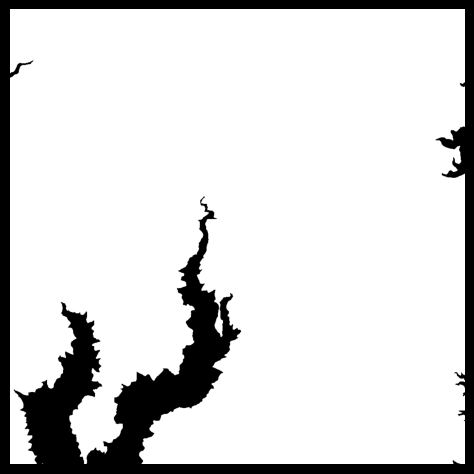

In [20]:
img_ = img #[:200,:200]
thresh_val = 20
img_small = cv.threshold(img_, thresh_val, 255, cv.THRESH_BINARY)[1]
cvlib.imgview(img_small)

In [21]:
x = np.arange(0,img_small.shape[0],1)
y = np.arange(0,img_small.shape[1],1)
# z = np.flip(img_small,axis=1)
z = img_small
Z = z
X, Y = np.meshgrid(x, y)

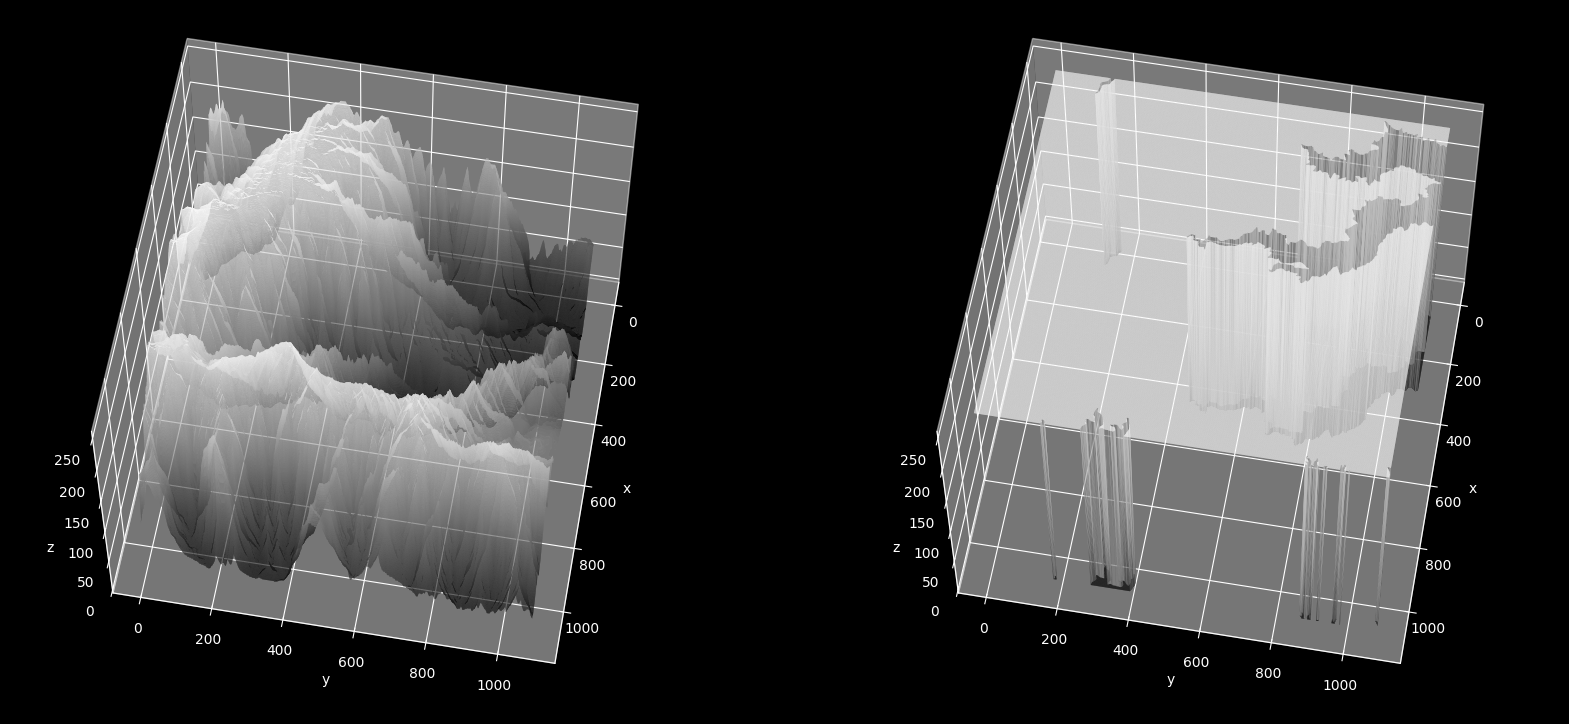

In [22]:
from mpl_toolkits import mplot3d
# from mpl_toolkits.mplot3d import axes3d    

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.view_init(60, 10)
# ax1.contour3D(X,Y,Z, 50,cmap='jet',vmin=0,vmax=255)
# ax1.plot_wireframe(X,Y,Z, cmap='viridis')
ax1.plot_surface(X, Y,img_, rstride=1, cstride=1,cmap='gray',vmin=0, vmax=255, edgecolor='none');
ax1.set_zlim(0,255)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z');

ax2.view_init(60, 10)
ax2.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='gray',vmin=0, vmax=255, edgecolor='none');
ax2.set_zlim(0,255)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z');

(256, 256)


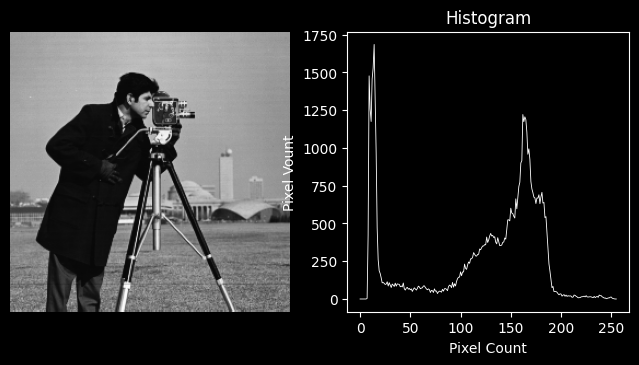

In [24]:
img = cv.imread(PATH+'\cameraman.tif', cv.IMREAD_COLOR)[:,:,0]
print(img.shape)
cvlib.hist(img)
ret_otsu, otsu = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

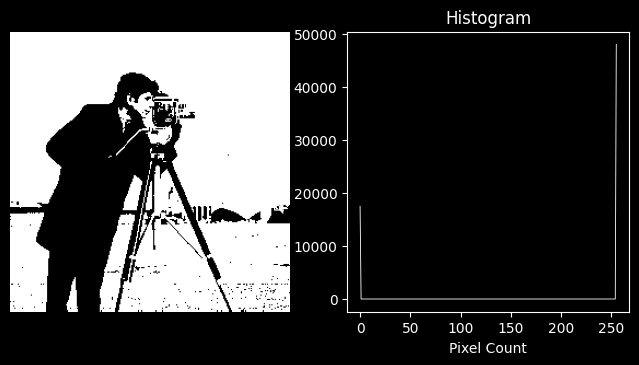

In [25]:
#print(ret_otsu)
cvlib.hist(otsu)

# ADAPTIVE THRESHOLDING
- El valor de binarizacion se calcula a partir de un bloque de pixeles vecinos.
- En otras palabras, se adapta a las condiciones locales

(408, 612, 3)


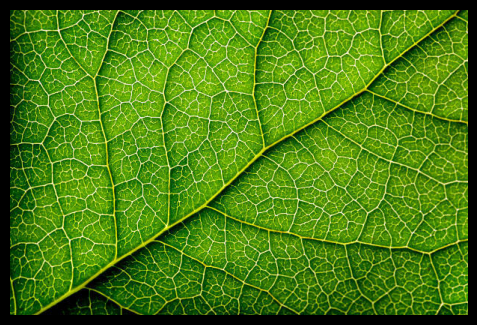

In [42]:
im = cv.imread(PATH+'\leaf.jpg', cv.IMREAD_COLOR)
img_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
print(img_rgb.shape)
cvlib.imgview(img_rgb)

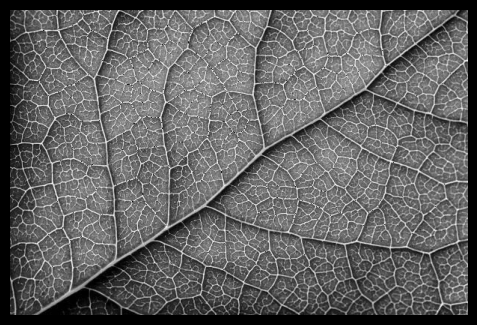

In [45]:
def rgb2gray(rgb):
    """ Convert an RGB image to grayscale
    Args:
        rgb (numpy array): RGB image
    Returns:
        gray (numpy array): Grayscale image
    """
    
    gray = np.dot(rgb[...,:3], [0.299, 0.587, 0.144]).astype(np.uint8)

    return gray

img = rgb2gray(img_rgb)
cvlib.imgview(img)

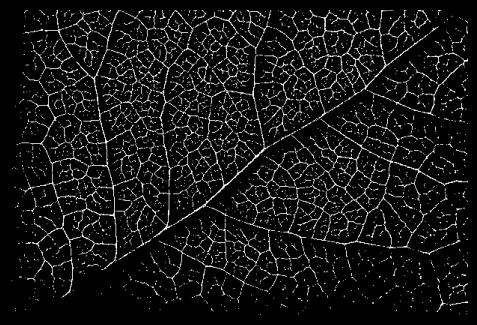

In [46]:
thresh_val = 180
img_binarized = cv.threshold(img, thresh_val, 255, cv.THRESH_BINARY)[1]
cvlib.imgview(img_binarized)

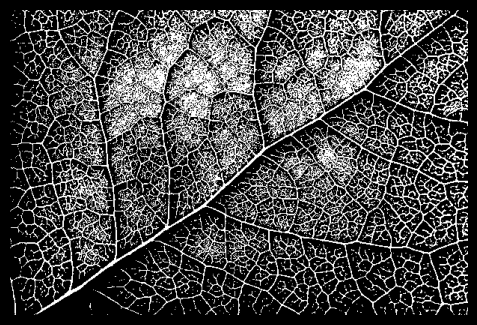

In [47]:
cvlib.imgview(cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)[1])

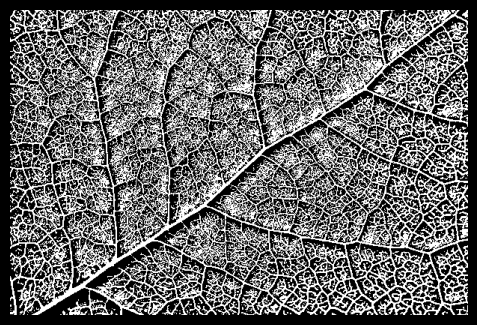

In [51]:
adaptive_m = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,31,7)
cvlib.imgview(adaptive_m)

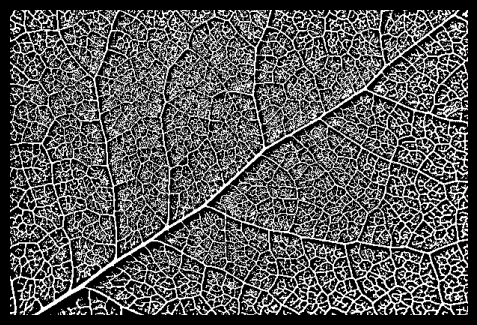

In [35]:
adaptive_g = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,31,2)
cvlib.imgview(adaptive_g)

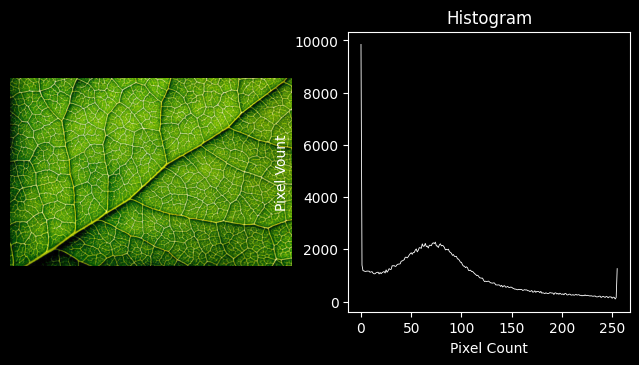

In [36]:
cvlib.hist(img_rgb)

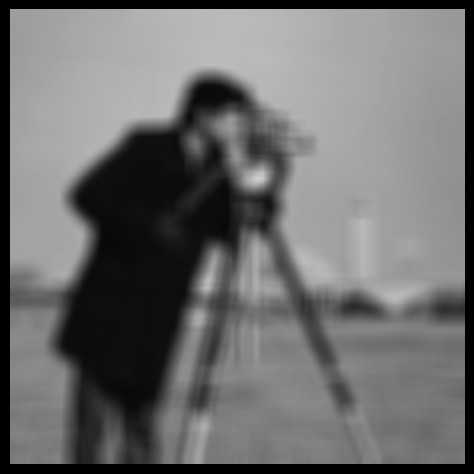

In [38]:
img = cv.imread(PATH+'\cameraman.tif', cv.IMREAD_COLOR)[:,:,0]
k = 11
cvlib.imgview(cv.blur(img,(k,k)))

In [39]:
img.shape

(256, 256)